# 1.

### Suppose the input graph G = (V, E) is stored in an adjacency matrix and we use an array for the priority queue. Implement the Dijkstra’s algorithm using this setting and analyze its time complexity with respect to |V| and |E| both theoretically and empirically.

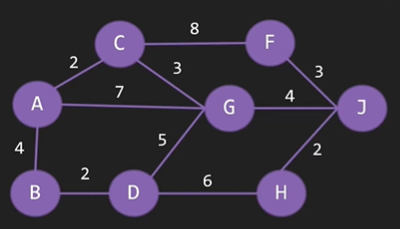    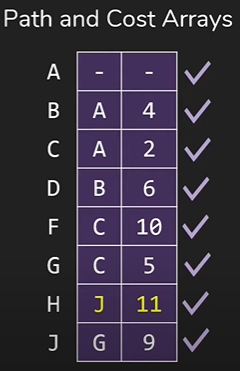

In [161]:
#undirected graph (from https://www.youtube.com/watch?v=CerlT7tTZfY&t=580s)
G1 = [[0, 4, 2, None, None, 7, None, None],   #0
    [4, 0, None, 2, None, None, None, None],   #1
    [2, None, 0, None, 8, 3, None, None],    #2
    [None, 2, None, 0, None, 5, 6, None],    #3
    [None, None, 8, None, 0, None, None, 3],   #4
    [7, None, 3, 5, None, 0, None, 4],     #5
    [None, None, None, 6, None, None, 0, 2],   #6
    [None, None, None, None, 3, 4, 2, 0]]    #7

#directed graph (from tutorial)
G2 = [[0, 4, 2, 6, 8],
      [None, 0, None, 4, 3],
      [None, None, 0, 1, None],
      [None, 1, None, 0, 3],
      [None, None, None, None, 0]]
    

    
def Dijkstra_MA(G, source, V):   #V is total number of vertices
    timesort = 0.0
    count = 1
    Q = []                #Q[x] = (from, to, cost)
    d,pi,S = [], [], []
    for v in range(V): 
        d.append(1e99)    #shortest distance from source to node v
        pi.append(None)   #predececent node
        S.append(0)       #Solution set
        
    d[source] = 0
    S[source] = 1
    
    #put all connected nodes into Q
    for n in range(V):
        if n!= source and G[source][n] != None:
            Q.append((source, n, G[source][n]))
    
    start = time.time()
    Q.sort(key=lambda tup: tup[2])       #Python uses Tim sort (merge + insertion)
    duration = time.time() - start
    timesort += duration
    #print(Q)
    
    while len(Q) != 0:
        u = Q.pop(0)         #extract smallest cost
        cn = u[1]
        
        if S[cn] == 0:
            S[cn] = 1        #node is newly visited
            count += 1
            d[cn] = u[2]
            pi[cn] = u[0]
            
            for v in range(V):
                if S[v] == 0 and v!= cn and G[cn][v] != None:   #for every node connected to current node
                    Q.append((cn, v, G[cn][v] + d[cn]))
        
        else:       #need to compare which is shorter
            if d[cn] > u[2]:
                d[cn] = u[2]
                pi[cn] = u[0]
        
        
        start = time.time()
        Q.sort(key=lambda tup: tup[2])
        duration = time.time() - start
        timesort += duration
        
        if (count == V): continue   #all nodes visited can end here
        
    
    #print(d, pi)
    print(timesort, count)
    

Dijkstra_MA(G2, 0, 5)


0.0 5


In [162]:
G2 = [[0, 4, 2, 6, 8],
      [None, 0, None, 4, 3],
      [None, None, 0, 1, None],
      [None, 1, None, 0, 3],
      [None, None, None, None, 0]]

def new_dijkstra(G, source, V):
    Q = []                #Q[x] = (from, to, cost)
    d,pi,S = [], [], []
    for v in range(V): 
        d.append(1e99)    #shortest distance from source to node v
        pi.append(None)   #predececent node
        S.append(0)       #Solution set
        
    d[source] = 0
    for v in range(V): Q.append((v, d[v]))
    
    while (len(Q) != 0):
        Q.sort(key=lambda tup: tup[1])
        u = Q.pop(0)
        cn = u[0]
        S[cn] = 1
        
        for v in range(V):
            if v!= u and G[cn][v] != None: 
                if S[v] != 1 and d[v] > d[cn] + G[cn][v]:
                    Q.remove((v, d[v]))
                    d[v] = d[cn] + G[cn][v]
                    pi[v] = cn
                    Q.append((v, d[v]))
                    
    #print(d, pi)

#new_dijkstra(G1, 0, 8)

In [163]:
g = generateGraph(100, 0.6)
M = convertGtoM(g, 100)
start = time.time()
new_dijkstra(M, 0, 100)
duration = time.time() - start
print(duration)

0.0013353824615478516


# Part B

In [164]:
from collections import defaultdict

#Implementation of Heap
class Heap():
  def __init__(self):
    self.array = []
    self.size = 0
    self.pos = []

  def newMinNode(self, v, dist):
    minNode = [v, dist]
    return minNode

  def swapMinNode(self, a, b):
      temp = self.array[a]
      self.array[a] = self.array[b]
      self.array[b] = temp

  def Heapify(self, root):
    smallest = root;
    left = 2*root + 1
    right = 2*root + 2

    if(left < self.size and self.array[left][1] < self.array[smallest][1]):
      smallest = left

    if(right < self.size and self.array[right][1] < self.array[smallest][1]):
      smallest = right

    if smallest != root:
      self.swapMinNode(smallest, root)

      # Swap positions
      self.pos[self.array[smallest][0]] = root
      self.pos[self.array[root][0]] = smallest

      # Swap nodes
      self.swapMinNode(smallest, root)

      self.Heapify(smallest)

  def extractMin(self):
    if self.isEmpty() == True:
      return
    root = self.array[0]

    last = self.array[self.size-1]
    self.array[0] = last

    self.pos[last[0]] = 0
    self.pos[root[0]] = self.size-1

    self.size -= 1
    self.Heapify(0)

    return root

  def deceaseKey(self, v, dist):
 
    i = self.pos[v]
    self.array[i][1] = dist

    while (i > 0 and self.array[i][1] < self.array[(i - 1) // 2][1]):

      # Swap this node with its parent
      self.pos[ self.array[i][0] ] = (i-1)//2
      self.pos[ self.array[(i-1)//2][0] ] = i
      self.swapMinNode(i, (i - 1)//2 )

      # move to parent index
      i = (i - 1) // 2;

  def isEmpty(self):
    if self.size == 0:
      return True
    else:
      return False

  def isInMinHeap(self, v):
      if self.pos[v] < self.size:
        return True
      return False

In [165]:
#Implemenation of Adjacency List 
class Graph_AdjacencyList():
  def __init__(self, V):
      self.V = V
      self.graph = defaultdict(list) #in python, we use dictionary for the adjacency list

  def addEdge(self, src, dest, weight):
      newNode = [dest, weight]
      self.graph[src].insert(0, newNode)

In [166]:
def dijkstraHeap(graph, source):
    V = graph.V 
    d = []   
    pi = []

    minHeap = Heap()

    for v in range(V):
      d.append(1e7)
      pi.append(None)
      minHeap.array.append( minHeap.newMinNode(v, d[v]))
      minHeap.pos.append(v)

    minHeap.pos[source] = source
    d[source] = 0
    minHeap.deceaseKey(source, d[source])

    # Initially size of min heap is equal to V
    minHeap.size = V;
    while minHeap.isEmpty() == False:

      newHeapNode = minHeap.extractMin()
      u = newHeapNode[0]

      for adjVertex in graph.graph[u]:
        v = adjVertex[0]

        if (minHeap.isInMinHeap(v) and d[u] != 1e7 and adjVertex[1] + d[u] < d[v]):
          d[v] = adjVertex[1] + d[u]
          pi[v] = u
          minHeap.deceaseKey(v, d[v])

    #print(d,pi)

#Graph from tutorial
graph = Graph_AdjacencyList(5)
graph.addEdge(0, 1, 4)
graph.addEdge(0, 2, 2)
graph.addEdge(0, 3, 6)
graph.addEdge(0, 4, 8)
graph.addEdge(1, 3, 4)
graph.addEdge(1, 4, 3)
graph.addEdge(2, 3, 1)
graph.addEdge(3, 1, 1)
graph.addEdge(3, 4, 3)
dijkstraHeap(graph,0)

# Creating random directional graphs

In [169]:
#creating graph
from networkx.generators.random_graphs import gnm_random_graph
import random

def generateGraph(n,e):
    #p = 0.5    #probability an edge exists btwn 2 vertices
    g = gnm_random_graph(n, e, directed=True)

    for (start, end) in g.edges:
        g.edges[start, end]['cost'] = random.randint(1,20)
        
    g.edges = list(g.edges.data('cost'))
    return g

#convert Graph type into matrix
def convertGtoM(G, V):   #V = number of vertices
    #create empty matrix first
    M = []
    for i in range(V):
        M.append([None for x in range(V)])
        
    for i in range(V):
        M[i][i] = 0
        
    for e in G.edges:
        M[e[0]][e[1]] = e[2]
        
    return M


#convert Graph type into Adj list  
def convertGtoL(G, V):
    adjacencyList = Graph_AdjacencyList(V)

    for e in G.edges:
        adjacencyList.addEdge(e[0], e[1], e[2])

    return adjacencyList

In [171]:
#Testing
import time

#axis for graphs to plot (time against #vertices and time against #edges)
plotAn, plotAe, plotAt = [], [], []
plotBn, plotBe, plotBt = [], [], []

n = 100
for e in range(10, n**2-n, 100):
    G = generateGraph(n, e)
    M = convertGtoM(G, n)
    L = convertGtoL(G, n)
    
    #Dijkstra Algo for part(a)
    start = time.time()
    new_dijkstra(M, 0, n)
    durationA = time.time() - start
    plotAn.append(n)
    plotAe.append(e)
    plotAt.append(durationA)
    
    #Dijkstra Algo for part(b)
    start = time.time()
    dijkstraHeap(L,0)
    durationB = time.time() - start
    plotBn.append(n)
    plotBe.append(e)
    plotBt.append(durationB)

#print(plotAe, plotAt)
#print(plotBe, plotBt)



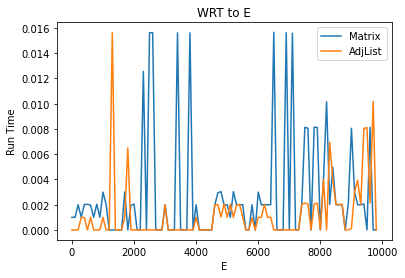

In [172]:
#Empricial analysis wrt to E
plt.plot(plotAe, plotAt, label = 'Matrix')
plt.plot(plotBe, plotBt, label = 'AdjList')
plt.xlabel('E')
plt.ylabel('Run Time')
plt.title('WRT to E')
plt.legend()
plt.show()